In [1]:
from pathlib import Path
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import KFold
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import clear_output

In [2]:
# Entscheidungsbaum
TREE_PARAMS = {
    "random_state" : 0,
    "max_depth": 7
}

In [3]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [4]:
app_train_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "app_train_mets.csv", index_col="SK_ID_CURR")
app_train_cats = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "app_train_cats.csv", index_col="SK_ID_CURR")
bureau_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "bureau_mets.csv", index_col="SK_ID_CURR")
bureau_cats = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "bureau_cats.csv", index_col="SK_ID_CURR")
pa_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "pa_mets.csv", index_col="SK_ID_CURR")
pa_cats = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "pa_cats.csv", index_col="SK_ID_CURR")
ip_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "ip_mets.csv", index_col="SK_ID_CURR")
pos_mets = pd.read_csv(DATASET_DIR / "Datenaufbereitung" / "pos_mets.csv", index_col="SK_ID_CURR")

c:\users\rober\documents\workspace\python\masterarbeit\venv\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
ip_mets = ip_mets.drop("TARGET", axis=1)
pos_mets = pos_mets.drop("TARGET", axis=1)

In [6]:
# join all ACHTUNG das ist die Schnittmenge! Zuvor sollten fehlende Daten aufbereitet werden.

In [7]:
app_train = pd.merge(app_train_mets, app_train_cats, left_index=True, right_index=True)
app_train = pd.merge(app_train, bureau_mets, left_index=True, right_index=True)
app_train = pd.merge(app_train, bureau_cats, left_index=True, right_index=True)
app_train = pd.merge(app_train, pa_mets, left_index=True, right_index=True)
app_train = pd.merge(app_train, pa_cats, left_index=True, right_index=True)
app_train = pd.merge(app_train, ip_mets, left_index=True, right_index=True)
app_train = pd.merge(app_train, pos_mets, left_index=True, right_index=True)

In [8]:
app_train.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,NAME_INCOME_TYPE,CODE_GENDER,NAME_EDUCATION_TYPE,REG_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,ORGANIZATION_TYPE,REGION_RATING_CLIENT,OCCUPATION_TYPE,DAYS_CREDIT_0.0,DAYS_CREDIT_0.25,DAYS_CREDIT_0.5,DAYS_CREDIT_0.75,DAYS_CREDIT_1.0,CREDIT_DAY_OVERDUE_0.0,CREDIT_DAY_OVERDUE_0.25,CREDIT_DAY_OVERDUE_0.5,CREDIT_DAY_OVERDUE_0.75,CREDIT_DAY_OVERDUE_1.0,DAYS_CREDIT_ENDDATE_0.0,DAYS_CREDIT_ENDDATE_0.25,DAYS_CREDIT_ENDDATE_0.5,DAYS_CREDIT_ENDDATE_0.75,DAYS_CREDIT_ENDDATE_1.0,AMT_CREDIT_MAX_OVERDUE_0.0,AMT_CREDIT_MAX_OVERDUE_0.25,AMT_CREDIT_MAX_OVERDUE_0.5,AMT_CREDIT_MAX_OVERDUE_0.75,AMT_CREDIT_MAX_OVERDUE_1.0,CNT_CREDIT_PROLONG_0.0,CNT_CREDIT_PROLONG_0.25,CNT_CREDIT_PROLONG_0.5,CNT_CREDIT_PROLONG_0.75,CNT_CREDIT_PROLONG_1.0,AMT_CREDIT_SUM_0.0,AMT_CREDIT_SUM_0.25,AMT_CREDIT_SUM_0.5,AMT_CREDIT_SUM_0.75,AMT_CREDIT_SUM_1.0,AMT_CREDIT_SUM_DEBT_0.0,AMT_CREDIT_SUM_DEBT_0.25,AMT_CREDIT_SUM_DEBT_0.5,AMT_CREDIT_SUM_DEBT_0.75,AMT_CREDIT_SUM_DEBT_1.0,AMT_CREDIT_SUM_LIMIT_0.0,AMT_CREDIT_SUM_LIMIT_0.25,AMT_CREDIT_SUM_LIMIT_0.5,AMT_CREDIT_SUM_LIMIT_0.75,AMT_CREDIT_SUM_LIMIT_1.0,AMT_CREDIT_SUM_OVERDUE_0.0,AMT_CREDIT_SUM_OVERDUE_0.25,AMT_CREDIT_SUM_OVERDUE_0.5,AMT_CREDIT_SUM_OVERDUE_0.75,AMT_CREDIT_SUM_OVERDUE_1.0,CREDIT_ACTIVE,AMT_DOWN_PAYMENT_0.0,AMT_DOWN_PAYMENT_0.25,AMT_DOWN_PAYMENT_0.5,AMT_DOWN_PAYMENT_0.75,AMT_DOWN_PAYMENT_1.0,RATE_DOWN_PAYMENT_0.0,RATE_DOWN_PAYMENT_0.25,RATE_DOWN_PAYMENT_0.5,RATE_DOWN_PAYMENT_0.75,RATE_DOWN_PAYMENT_1.0,DAYS_DECISION_0.0,DAYS_DECISION_0.25,DAYS_DECISION_0.5,DAYS_DECISION_0.75,DAYS_DECISION_1.0,SELLERPLACE_AREA_0.0,SELLERPLACE_AREA_0.25,SELLERPLACE_AREA_0.5,SELLERPLACE_AREA_0.75,SELLERPLACE_AREA_1.0,CNT_PAYMENT_0.0,CNT_PAYMENT_0.25,CNT_PAYMENT_0.5,CNT_PAYMENT_0.75,CNT_PAYMENT_1.0,DAYS_FIRST_DRAWING_0.0,DAYS_FIRST_DRAWING_0.25,DAYS_FIRST_DRAWING_0.5,DAYS_FIRST_DRAWING_0.75,DAYS_FIRST_DRAWING_1.0,DAYS_FIRST_DUE_0.0,DAYS_FIRST_DUE_0.25,DAYS_FIRST_DUE_0.5,DAYS_FIRST_DUE_0.75,DAYS_FIRST_DUE_1.0,DAYS_LAST_DUE_1ST_VERSION_0.0,DAYS_LAST_DUE_1ST_VERSION_0.25,DAYS_LAST_DUE_1ST_VERSION_0.5,DAYS_LAST_DUE_1ST_VERSION_0.75,DAYS_LAST_DUE_1ST_VERSION_1.0,AMT_APPLICATION_0.0,AMT_APPLICATION_0.25,AMT_APPLICATION_0.5,AMT_APPLICATION_0.75,AMT_APPLICATION_1.0,DAYS_TERMINATION_0.0,DAYS_TERMINATION_0.25,DAYS_TERMINATION_0.5,DAYS_TERMINATION_0.75,DAYS_TERMINATION_1.0,NAME_CONTRACT_STATUS Refused,CODE_REJECT_REASON HC,NAME_YIELD_GROUP low_normal,NAME_CONTRACT_TYPE Revolving loans,PRODUCT_COMBINATION Card Street,NAME_CLIENT_TYPE New,NAME_YIELD_GROUP high,NAME_PORTFOLIO Cards,PRODUCT_COMBINATION Cash X-Sell: low,NAME_CLIENT_TYPE Refreshed,PRODUCT_COMBINATION POS industry with interest,MIN_TIMEDIFF,MIN_AMTDIFF,MEAN_TIMEDIFF,MEAN_AMTDIFF,MAX_TIMEDIFF,MAX_AMTDIFF,CNT_CREDITS_PAST,CNT_CREDITS_CURR,SUM_PAYCOUNTS_MONTHS,SUM_DPD
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,0,202500.0,406597.5,0.018801,-9461,-637,-3648.0,-2120,0.083037,0.262949,0.139376,0.9722,0.0149,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,-1437.0,-1122.0,-1042.5,-602.75,-103.0,0.0,0.0,0.0,0.0,0.0,-1072.0,-1006.25,-424.5,79.25,780.0,0.0,0.0,40.5,3321.0,5043.645,0.0,0.0,0.0,0.0,0.0,0.0,28759.17375,54130.5,124301.25,450000.0,0.0,0.0,0.0,0.0,245781.0,0.0,0.0,0.0,7997.14125,31988.565,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-606.0,-606.0,-606.0,-606.0,-606.0,500.0,500.0,500.0,500.0,500.0,24.0,24.0,24.0,24.0,24.0,365243.0,365243.0,365243.0,365243.0,365243.0,-565.0,-565.0,-565.0,-565.0,-565.0,125.0,125.0,125.0,125.0,125.0,179055.0,179055.0,179055.0,179055.0,17

In [9]:
# Ermittlung Reihenfolge

In [10]:
y = app_train["TARGET"]
x = app_train.drop(["TARGET"], axis=1)

In [11]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [12]:
# logistisches Regressionsmodell
model = DecisionTreeClassifier(**TREE_PARAMS)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=0)

In [13]:
auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
fpr, tpr, threshold = roc_curve(y_test, model.predict_proba(x_test)[:,1])
print(auc)

0.7340395453674606


In [14]:
# Koeffizienten der einzelnen Klassen
coef_dict = {}
for coef, feat in zip(model.feature_importances_, x.columns.values):
    coef_dict[feat] = coef

In [15]:
# Feature Importance
d = dict(sorted(coef_dict.items(), key=lambda item: item[1], reverse=True))
order = list(d.keys())

In [16]:
#Entscheidungsbaum Parameterbestimmung

In [17]:
data = {
        "auc":[],
        "auc_adj":[],
        "p" : [],
        "n": []
       }

auc_temp = 0.5
heads_gain = []
drop = []

HEADS = order
df = app_train

for index, h in enumerate(HEADS):
    
    heads_gain.append(h)
    
    X = df[heads_gain + ["TARGET"]]
    y = X["TARGET"]
    x = X.drop(["TARGET"], axis=1)
    
    model = DecisionTreeClassifier(**TREE_PARAMS).fit(x, y)
    
    n = len(X)
    p = len(X.columns)
    
    aucs = []

    kfold = KFold(2, shuffle=True, random_state=1)

    # enumerate splits
    for i, (train, test) in enumerate(kfold.split(x)):

        model.fit(x.iloc[train], y.iloc[train])
        auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
        aucs.append(auc)
    
    auc = np.mean(aucs)
    auc_adj = 1-(1-auc)*(n-1)/(n-p-1)
    
    if auc_adj > auc_temp:
        
        data["auc"].append(auc)
        data["auc_adj"].append(auc_adj)
        data["p"].append(p)
        data["n"].append(n)
        
        auc_temp = auc_adj
        
    else:
        heads_gain.remove(h)
        drop.append(h)
    
    clear_output(wait=True)
    print(auc_adj, index+1, len(HEADS), drop)

0.7379167068532217 145 145 ['DAYS_CREDIT_1.0', 'DAYS_CREDIT_ENDDATE_0.5', 'AMT_CREDIT_SUM_OVERDUE_1.0', 'DAYS_CREDIT_0.25', 'DAYS_ID_PUBLISH', 'CODE_REJECT_REASON HC', 'CNT_PAYMENT_0.25', 'DAYS_LAST_DUE_1ST_VERSION_1.0', 'DAYS_CREDIT_0.5', 'DAYS_FIRST_DRAWING_0.0', 'DAYS_CREDIT_0.75', 'DAYS_LAST_DUE_1ST_VERSION_0.75', 'SUM_PAYCOUNTS_MONTHS', 'CNT_PAYMENT_0.5', 'AMT_APPLICATION_0.75', 'DAYS_DECISION_1.0', 'AMT_CREDIT_SUM_0.75', 'DAYS_DECISION_0.5', 'MAX_AMTDIFF', 'NAME_PORTFOLIO Cards', 'DAYS_DECISION_0.75', 'MAX_TIMEDIFF', 'YEARS_BEGINEXPLUATATION_AVG', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_MAX_OVERDUE_1.0', 'SUM_DPD', 'DAYS_FIRST_DRAWING_0.75', 'CREDIT_DAY_OVERDUE_1.0', 'DEF_30_CNT_SOCIAL_CIRCLE', 'MEAN_TIMEDIFF', 'AMT_APPLICATION_0.5', 'NAME_YIELD_GROUP low_normal', 'TOTALAREA_MODE', 'CNT_PAYMENT_1.0', 'CNT_CHILDREN', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_REGISTRATION', 'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ

         auc   auc_adj   p        n
36  0.737925  0.737918  38  1391127


['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'DAYS_CREDIT_ENDDATE_0.75',
 'DAYS_EMPLOYED',
 'CNT_PAYMENT_0.75',
 'MEAN_AMTDIFF',
 'DAYS_TERMINATION_0.25',
 'SELLERPLACE_AREA_1.0',
 'AMT_CREDIT_SUM_0.0',
 'DAYS_LAST_DUE_1ST_VERSION_0.0',
 'PRODUCT_COMBINATION POS industry with interest',
 'AMT_CREDIT_SUM_DEBT_0.0',
 'DAYS_CREDIT_ENDDATE_1.0',
 'PRODUCT_COMBINATION Card Street',
 'AMT_DOWN_PAYMENT_0.75',
 'AMT_APPLICATION_1.0',
 'DAYS_CREDIT_0.0',
 'AMT_CREDIT_SUM_DEBT_1.0',
 'AMT_DOWN_PAYMENT_1.0',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'AMT_CREDIT_MAX_OVERDUE_0.25',
 'NAME_EDUCATION_TYPE',
 'DAYS_FIRST_DUE_1.0',
 'AMT_CREDIT_SUM_OVERDUE_0.75',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_CREDIT_SUM_1.0',
 'AMT_CREDIT_SUM_DEBT_0.5',
 'AMT_CREDIT_SUM_DEBT_0.75',
 'SELLERPLACE_AREA_0.25',
 'DAYS_FIRST_DUE_0.25',
 'DAYS_FIRST_DUE_0.5',
 'DAYS_FIRST_DUE_0.75',
 'AMT_APPLICATION_0.0',
 'DAYS_TERMINATION_0.0']

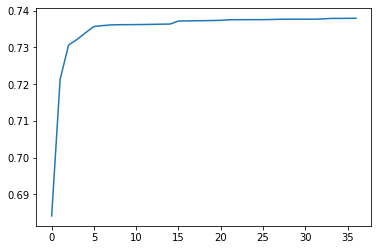

In [18]:
result = pd.DataFrame(data)

print(result[result["auc_adj"] == result["auc_adj"].max()])
result["auc_adj"].plot()

heads_gain

In [19]:
model = DecisionTreeClassifier(**TREE_PARAMS)

aucs = []

kfold = KFold(5, shuffle=True, random_state=1)
data = df[heads_gain]

# enumerate splits
for i, (train, test) in enumerate(kfold.split(data)):
    
    model.fit(x.iloc[train], y.iloc[train])
    auc = roc_auc_score(y.iloc[test], model.predict_proba(x.iloc[test])[:,1])
    aucs.append(auc)
    
    print('train: %s, test: %s, auc: %s' % (train, test, auc))

print("\n")
print("Durchschnitt: %.2f" % (np.mean(aucs)))
print("Standardabw.: %.2f" % (np.std(aucs)))
print("Varianz:      %.2f" % (np.var(aucs)))

train: [      1       2       4 ... 1391124 1391125 1391126], test: [      0       3       8 ... 1391115 1391118 1391121], auc: 0.7365266593736763
train: [      0       1       2 ... 1391123 1391124 1391125], test: [      6       7      10 ... 1391119 1391120 1391126], auc: 0.7343128176262876
train: [      0       1       3 ... 1391124 1391125 1391126], test: [      2      14      15 ... 1391104 1391111 1391116], auc: 0.7395362374501664
train: [      0       2       3 ... 1391124 1391125 1391126], test: [      1       4       5 ... 1391110 1391113 1391114], auc: 0.7352729701491155
train: [      0       1       2 ... 1391120 1391121 1391126], test: [     22      30      40 ... 1391123 1391124 1391125], auc: 0.735038512043089


Durchschnitt: 0.74
Standardabw.: 0.00
Varianz:      0.00
